In [33]:
# ============================================================
# Integrative Ensemble and Meta-Learning Models for Cardiovascular Risk Prediction
# Authors: Kaan Kara, MSc; Oykum Esra Yigit, Assoc. Prof. Dr.; Tuba Gunel, Prof. Dr.*
# Date: 2025-09-03
# Description: Python implementations of ensemble and meta-learning models for predicting cardiovascular risk.
# ============================================================

In [1]:
# =============================================
# Cardiovascular Risk Prediction - Data Loading
# =============================================

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for clean output (useful for GitHub demos)
warnings.filterwarnings("ignore")

# ----------------------------
# Load dataset
# ----------------------------
file_path = "TEZ_DATASET.csv"  # Path to your CSV file
data = pd.read_csv(file_path)

# Replace spaces in column names with underscores for easier access
data.columns = [col.replace(" ", "_") for col in data.columns]

# ----------------------------
# Display dataset info
# ----------------------------
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset information:")
print(data.info())


First 5 rows of the dataset:
   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  

Dataset information:
<class

In [2]:
# =============================================
# Feature Identification and Scaling
# =============================================

# Define categorical and continuous features
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
                        'resting_ecg', 'exercise_angina', 'ST_slope', 'target']

continuous_features = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

# Display feature types
print("Categorical features:", categorical_features)
print("Continuous features:", continuous_features)

# ----------------------------
# Feature Scaling
# ----------------------------
from sklearn.preprocessing import StandardScaler

# Columns to be scaled
numerical_cols = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nScaled dataset preview:")
print(data.head())

# ----------------------------
# Train-Test Split
# ----------------------------
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Display dataset sizes
print(f"\nTotal data points: {len(data)}")
print(f"Training data points: {len(train_data)}")
print(f"Testing data points: {len(test_data)}")


Categorical features: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'ST_slope', 'target']
Continuous features: ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

Scaled dataset preview:
        age  sex  chest_pain_type  resting_bp_s  cholesterol  \
0 -1.466728    1                2      0.427328     0.775674   
1 -0.504600    0                3      1.516587    -0.299512   
2 -1.787437    1                2     -0.117301     0.716489   
3 -0.611503    0                4      0.318402     0.035867   
4  0.029915    1                3      0.971958    -0.151550   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
0                    0            0        1.265039                0   
1                    0            0        0.637758                0   
2                    0            1       -1.636136                0   
3                    0            0       -1.244085                1   
4            

Initial AdaBoost Model Accuracy: 0.8908
K-Fold Mean Accuracy (Initial Model): 0.8445
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150}
Best Cross-Validated Accuracy: 0.8466
Test Accuracy of Best AdaBoost Model: 0.8739
K-Fold Mean Accuracy (Best Model): 0.8498

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       107
           1       0.87      0.91      0.89       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



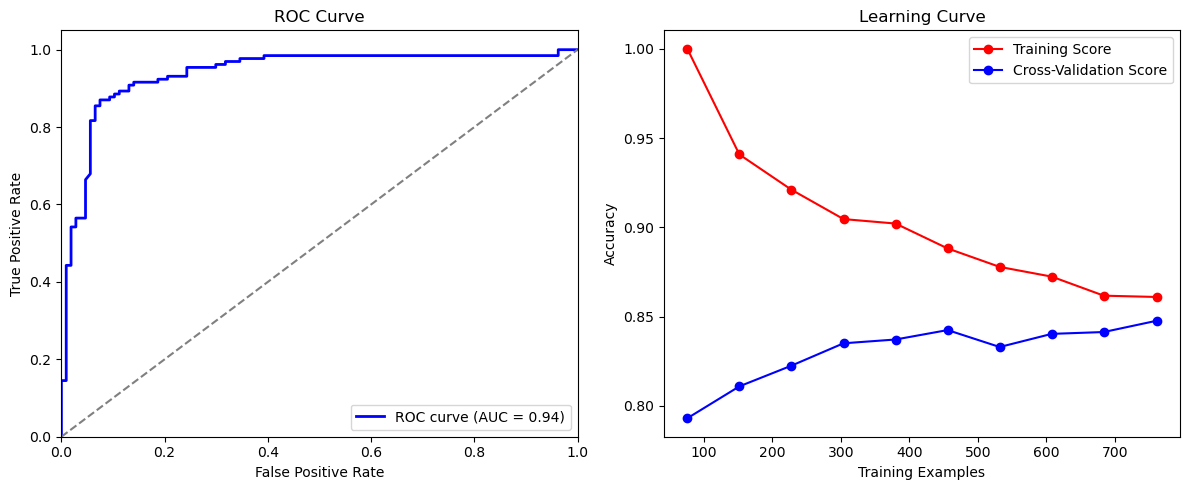

In [3]:
# =============================================
# AdaBoost Model Training and Evaluation
# =============================================

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold, GridSearchCV, learning_curve
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Feature and target separation
# ----------------------------
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']
X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# ----------------------------
# Initial AdaBoost model
# ----------------------------
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Predictions on test set
y_pred = adaboost_model.predict(X_test)

# Model accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred)
print(f"Initial AdaBoost Model Accuracy: {accuracy_adaboost:.4f}")

# ----------------------------
# K-Fold Cross-Validation
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
adaboost_scores = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    adaboost_model.fit(X_fold_train, y_fold_train)
    y_fold_pred = adaboost_model.predict(X_fold_val)
    adaboost_scores.append(accuracy_score(y_fold_val, y_fold_pred))

print(f"K-Fold Mean Accuracy (Initial Model): {np.mean(adaboost_scores):.4f}")

# ----------------------------
# Hyperparameter Tuning with GridSearchCV
# ----------------------------
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")

# ----------------------------
# Evaluate best model on test set
# ----------------------------
best_adaboost_model = grid_search.best_estimator_
y_pred = best_adaboost_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Best AdaBoost Model: {accuracy_best:.4f}")

# ----------------------------
# K-Fold Cross-Validation for Best Model
# ----------------------------
adaboost_scores = []
for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    best_adaboost_model.fit(X_fold_train, y_fold_train)
    y_fold_pred = best_adaboost_model.predict(X_fold_val)
    adaboost_scores.append(accuracy_score(y_fold_val, y_fold_pred))

print(f"K-Fold Mean Accuracy (Best Model): {np.mean(adaboost_scores):.4f}")

# ----------------------------
# Model Performance Metrics
# ----------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ROC Curve (if predict_proba is available)
if hasattr(best_adaboost_model, "predict_proba"):
    fpr, tpr, _ = roc_curve(y_test, best_adaboost_model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
else:
    fpr, tpr, roc_auc = [None] * 3

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_adaboost_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# ----------------------------
# Plot ROC Curve and Learning Curve
# ----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
if fpr is not None:
    ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('ROC Curve')
    ax[0].legend(loc='lower right')
else:
    ax[0].text(0.5, 0.5, 'ROC Curve Not Available', horizontalalignment='center',
               verticalalignment='center', fontsize=12)
    ax[0].set_title('ROC Curve')

# Learning Curve
ax[1].plot(train_sizes, train_mean, 'o-', color='red', label='Training Score')
ax[1].plot(train_sizes, test_mean, 'o-', color='blue', label='Cross-Validation Score')
ax[1].set_xlabel('Training Examples')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Learning Curve')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()


Initial GBM Model Accuracy: 0.9202
K-Fold Mean Accuracy (Initial GBM): 0.8582
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validated Accuracy: 0.9076
Test Accuracy of Best GBM Model: 0.9538
K-Fold Cross-Validation Accuracy Scores: [0.89528796 0.91623037 0.9        0.88947368 0.93684211]
Mean K-Fold Accuracy: 0.9076

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.95      0.97      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



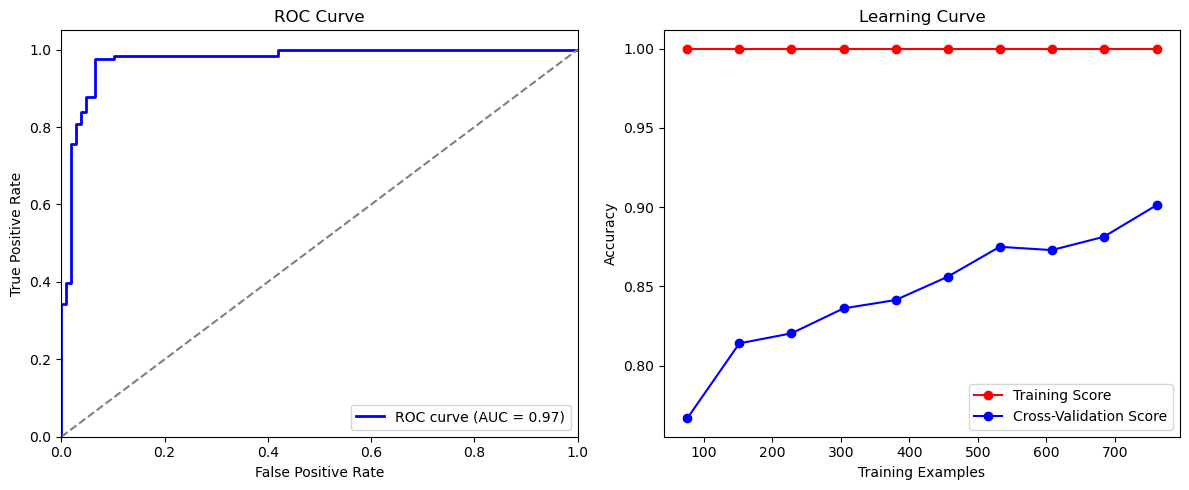

In [4]:
# =============================================
# Gradient Boosting Machine (GBM) Model Training and Evaluation
# =============================================

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Initial GBM model
# ----------------------------
gbm_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

# Predictions on test set
y_pred_gbm = gbm_model.predict(X_test)

# Model accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"Initial GBM Model Accuracy: {accuracy_gbm:.4f}")

# ----------------------------
# K-Fold Cross-Validation for GBM
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gbm_scores = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    gbm_model.fit(X_fold_train, y_fold_train)
    y_fold_pred_gbm = gbm_model.predict(X_fold_val)
    gbm_scores.append(accuracy_score(y_fold_val, y_fold_pred_gbm))

print(f"K-Fold Mean Accuracy (Initial GBM): {np.mean(gbm_scores):.4f}")

# ----------------------------
# Hyperparameter Tuning with GridSearchCV
# ----------------------------
gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

gbm_kf = KFold(n_splits=5, shuffle=True, random_state=42)

gbm_grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gbm_param_grid,
    scoring='accuracy',
    cv=gbm_kf,
    n_jobs=-1
)

gbm_grid_search.fit(X_train, y_train)

# Best hyperparameters and cross-validated accuracy
print(f"Best Hyperparameters: {gbm_grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {gbm_grid_search.best_score_:.4f}")

# ----------------------------
# Evaluate best GBM model on test set
# ----------------------------
best_gbm_model = gbm_grid_search.best_estimator_
y_pred_best_gbm = best_gbm_model.predict(X_test)
accuracy_best_gbm = accuracy_score(y_test, y_pred_best_gbm)
print(f"Test Accuracy of Best GBM Model: {accuracy_best_gbm:.4f}")

# K-Fold Cross-Validation for Best GBM Model
kfold_scores = cross_val_score(best_gbm_model, X_train, y_train, cv=gbm_kf, scoring='accuracy', n_jobs=-1)
print("K-Fold Cross-Validation Accuracy Scores:", kfold_scores)
print(f"Mean K-Fold Accuracy: {kfold_scores.mean():.4f}")

# ----------------------------
# Model Performance Metrics
# ----------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best_gbm))

# ROC Curve (check if predict_proba is available)
if hasattr(best_gbm_model, "predict_proba"):
    fpr_gbm, tpr_gbm, _ = roc_curve(y_test, best_gbm_model.predict_proba(X_test)[:, 1])
    roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
else:
    fpr_gbm, tpr_gbm, roc_auc_gbm = [None] * 3

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_gbm_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# ----------------------------
# Plot ROC Curve and Learning Curve
# ----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
if fpr_gbm is not None:
    ax[0].plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_gbm:.2f})')
    ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('ROC Curve')
    ax[0].legend(loc='lower right')
else:
    ax[0].text(0.5, 0.5, 'ROC Curve Not Available', horizontalalignment='center',
               verticalalignment='center', fontsize=12)
    ax[0].set_title('ROC Curve')

# Learning Curve
ax[1].plot(train_sizes, train_mean, 'o-', color='red', label='Training Score')
ax[1].plot(train_sizes, test_mean, 'o-', color='blue', label='Cross-Validation Score')
ax[1].set_xlabel('Training Examples')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Learning Curve')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()


Initial XGBoost Model Accuracy: 0.9034
K-Fold Mean Accuracy (Initial XGBoost): 0.8992
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validated Accuracy: 0.9033
Test Accuracy of Best XGBoost Model: 0.9412
K-Fold Cross-Validation Accuracy Scores: [0.92146597 0.91623037 0.88421053 0.91578947 0.87894737]
Mean K-Fold Accuracy: 0.9033

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       107
           1       0.93      0.96      0.95       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



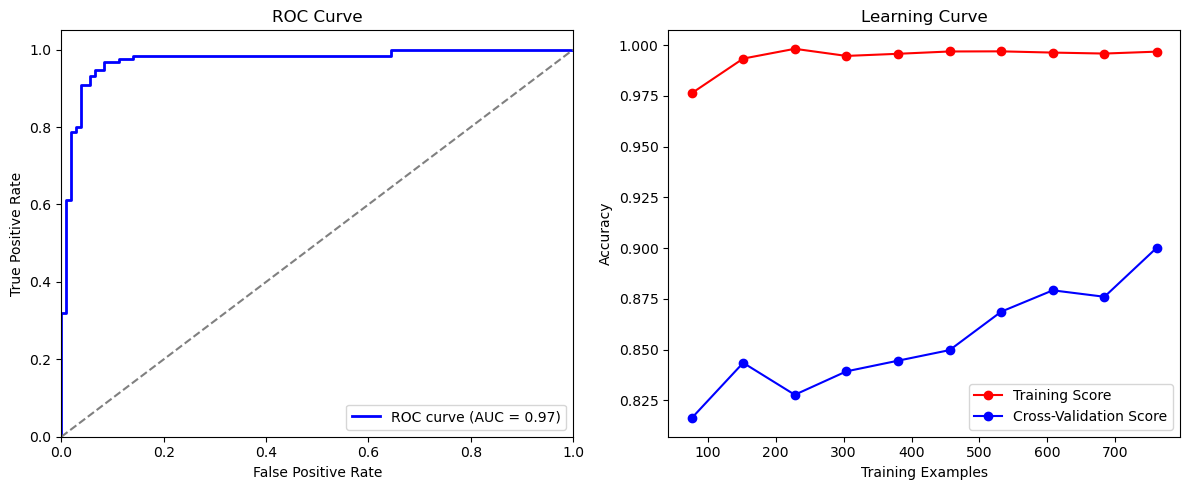

In [5]:
# =============================================
# XGBoost Model Training and Evaluation
# =============================================

from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Initial XGBoost model
# ----------------------------
xgb_model = XGBClassifier(n_estimators=50, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions on test set
y_pred_xgb = xgb_model.predict(X_test)

# Model accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Initial XGBoost Model Accuracy: {accuracy_xgb:.4f}")

# ----------------------------
# K-Fold Cross-Validation for XGBoost
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_scores = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    xgb_model.fit(X_fold_train, y_fold_train)
    y_fold_pred_xgb = xgb_model.predict(X_fold_val)
    xgb_scores.append(accuracy_score(y_fold_val, y_fold_pred_xgb))

print(f"K-Fold Mean Accuracy (Initial XGBoost): {np.mean(xgb_scores):.4f}")

# ----------------------------
# Hyperparameter Tuning with GridSearchCV
# ----------------------------
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best hyperparameters and accuracy
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")

# ----------------------------
# Evaluate best XGBoost model on test set
# ----------------------------
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"Test Accuracy of Best XGBoost Model: {accuracy_best_xgb:.4f}")

# K-Fold Cross-Validation for Best XGBoost Model
kfold_scores_xgb = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("K-Fold Cross-Validation Accuracy Scores:", kfold_scores_xgb)
print(f"Mean K-Fold Accuracy: {kfold_scores_xgb.mean():.4f}")

# ----------------------------
# Model Performance Metrics
# ----------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best_xgb))

# ROC Curve (check if predict_proba is available)
if hasattr(best_xgb_model, "predict_proba"):
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
else:
    fpr_xgb, tpr_xgb, roc_auc_xgb = [None] * 3

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# ----------------------------
# Plot ROC Curve and Learning Curve
# ----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
if fpr_xgb is not None:
    ax[0].plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
    ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('ROC Curve')
    ax[0].legend(loc='lower right')
else:
    ax[0].text(0.5, 0.5, 'ROC Curve Not Available', horizontalalignment='center',
               verticalalignment='center', fontsize=12)
    ax[0].set_title('ROC Curve')

# Learning Curve
ax[1].plot(train_sizes, train_mean, 'o-', color='red', label='Training Score')
ax[1].plot(train_sizes, test_mean, 'o-', color='blue', label='Cross-Validation Score')
ax[1].set_xlabel('Training Examples')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Learning Curve')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()


Initial LightGBM Model Accuracy: 0.9496
K-Fold Mean Accuracy (Initial LightGBM): 0.8971
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validated Accuracy: 0.9023
Test Accuracy of Best LightGBM Model: 0.9454
K-Fold Mean Accuracy (Best LightGBM): 0.8908


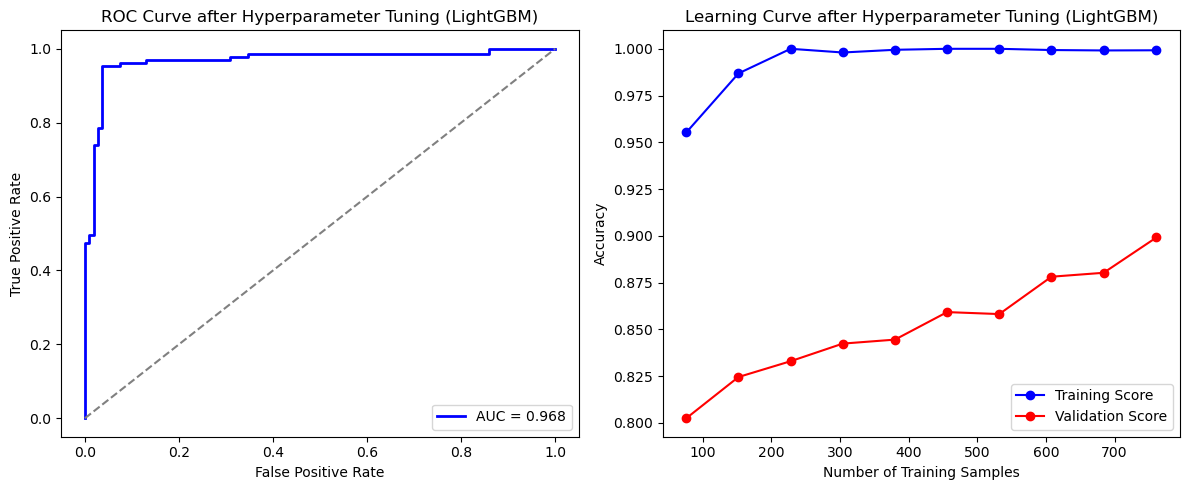

In [6]:
# =============================================
# LightGBM Model Training and Evaluation
# =============================================

from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Initial LightGBM model
# ----------------------------
lgbm_model = LGBMClassifier(n_estimators=50, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_model.fit(X_train, y_train)

# Predictions on test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Model accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Initial LightGBM Model Accuracy: {accuracy_lgbm:.4f}")

# ----------------------------
# K-Fold Cross-Validation
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lgbm_scores = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    lgbm_model.fit(X_fold_train, y_fold_train)
    y_fold_pred_lgbm = lgbm_model.predict(X_fold_val)
    lgbm_scores.append(accuracy_score(y_fold_val, y_fold_pred_lgbm))

print(f"K-Fold Mean Accuracy (Initial LightGBM): {np.mean(lgbm_scores):.4f}")

# ----------------------------
# Hyperparameter Tuning with GridSearchCV
# ----------------------------
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

lgbm_grid_search = GridSearchCV(
    LGBMClassifier(random_state=42, verbose=-1),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
lgbm_grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {lgbm_grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {lgbm_grid_search.best_score_:.4f}")

# ----------------------------
# Train Best LightGBM Model
# ----------------------------
best_lgbm_model = LGBMClassifier(**lgbm_grid_search.best_params_, random_state=42)
best_lgbm_model.fit(X_train, y_train)

y_pred_best_lgbm = best_lgbm_model.predict(X_test)
accuracy_best_lgbm = accuracy_score(y_test, y_pred_best_lgbm)
print(f"Test Accuracy of Best LightGBM Model: {accuracy_best_lgbm:.4f}")

# K-Fold Cross-Validation for Best Model
best_lgbm_scores = []
for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    best_lgbm_model.fit(X_fold_train, y_fold_train)
    y_fold_pred_best_lgbm = best_lgbm_model.predict(X_fold_val)
    best_lgbm_scores.append(accuracy_score(y_fold_val, y_fold_pred_best_lgbm))

print(f"K-Fold Mean Accuracy (Best LightGBM): {np.mean(best_lgbm_scores):.4f}")

# ----------------------------
# ROC Curve and Learning Curve
# ----------------------------
# ROC probabilities
y_probs_lgbm = best_lgbm_model.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_probs_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    best_lgbm_model,
    X_train, y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
axes[0].plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'AUC = {roc_auc_lgbm:.3f}')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_title('ROC Curve after Hyperparameter Tuning (LightGBM)')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='lower right')

# Learning Curve
axes[1].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
axes[1].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
axes[1].set_title('Learning Curve after Hyperparameter Tuning (LightGBM)')
axes[1].set_xlabel('Number of Training Samples')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


Stochastic Gradient Boosting Model Accuracy: 0.9244
K-Fold Mean Accuracy (Initial SGB): 0.8519
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Test Accuracy of Best SGB Model: 0.9496
K-Fold Mean Accuracy (Best SGB): 0.9013

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       107
           1       0.92      0.94      0.93       131

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



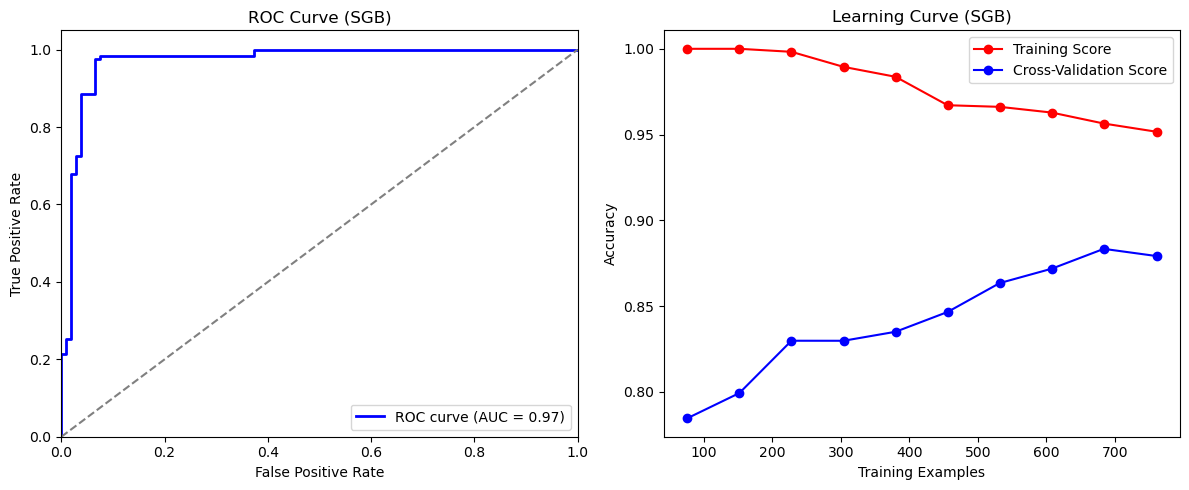

In [7]:
# =============================================
# Stochastic Gradient Boosting (SGB) Model
# =============================================

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Initial SGB model
# ----------------------------
sgb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
sgb_model.fit(X_train, y_train)

# Predictions on test set
y_pred_sgb = sgb_model.predict(X_test)

# Model accuracy
accuracy_sgb = accuracy_score(y_test, y_pred_sgb)
print(f"Stochastic Gradient Boosting Model Accuracy: {accuracy_sgb:.4f}")

# ----------------------------
# K-Fold Cross-Validation
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgb_scores = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train a temporary SGB model for each fold
    sgb_temp = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, subsample=0.8, random_state=42)
    sgb_temp.fit(X_fold_train, y_fold_train)
    
    y_fold_pred_sgb = sgb_temp.predict(X_fold_val)
    sgb_scores.append(accuracy_score(y_fold_val, y_fold_pred_sgb))

kfold_mean_sgb = np.mean(sgb_scores)
print(f"K-Fold Mean Accuracy (Initial SGB): {kfold_mean_sgb:.4f}")

# ----------------------------
# Hyperparameter Tuning
# ----------------------------
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

sgb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(
    sgb_model,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# ----------------------------
# Train Best SGB Model
# ----------------------------
best_sgb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_sgb_model.fit(X_train, y_train)

y_pred_best_sgb = best_sgb_model.predict(X_test)
best_accuracy_sgb = accuracy_score(y_test, y_pred_best_sgb)
print(f"Test Accuracy of Best SGB Model: {best_accuracy_sgb:.4f}")

# K-Fold Cross-Validation for optimized model
optimized_sgb_scores = []
for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    sgb_temp = GradientBoostingClassifier(**best_params, random_state=42)
    sgb_temp.fit(X_fold_train, y_fold_train)
    
    y_fold_pred_sgb = sgb_temp.predict(X_fold_val)
    optimized_sgb_scores.append(accuracy_score(y_fold_val, y_fold_pred_sgb))

kfold_mean_best_sgb = np.mean(optimized_sgb_scores)
print(f"K-Fold Mean Accuracy (Best SGB): {kfold_mean_best_sgb:.4f}")

# ----------------------------
# Classification Report, ROC and Learning Curve
# ----------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_sgb))

# ROC Curve
if hasattr(best_sgb_model, "predict_proba"):
    fpr, tpr, _ = roc_curve(y_test, best_sgb_model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
else:
    fpr, tpr, roc_auc = [None]*3

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    sgb_model,
    X_train, y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
if fpr is not None:
    ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('ROC Curve (SGB)')
    ax[0].legend(loc='lower right')
else:
    ax[0].text(0.5, 0.5, 'ROC Curve Not Available', horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax[0].set_title('ROC Curve')

# Learning Curve
ax[1].plot(train_sizes, train_mean, 'o-', color='red', label='Training Score')
ax[1].plot(train_sizes, test_mean, 'o-', color='blue', label='Cross-Validation Score')
ax[1].set_xlabel('Training Examples')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Learning Curve (SGB)')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()


Random Forest Model Accuracy: 0.9496
K-Fold Mean Accuracy (Initial RF): 0.9023
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy of Best RF Model: 0.9496
K-Fold Mean Accuracy (Best RF): 0.9023

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



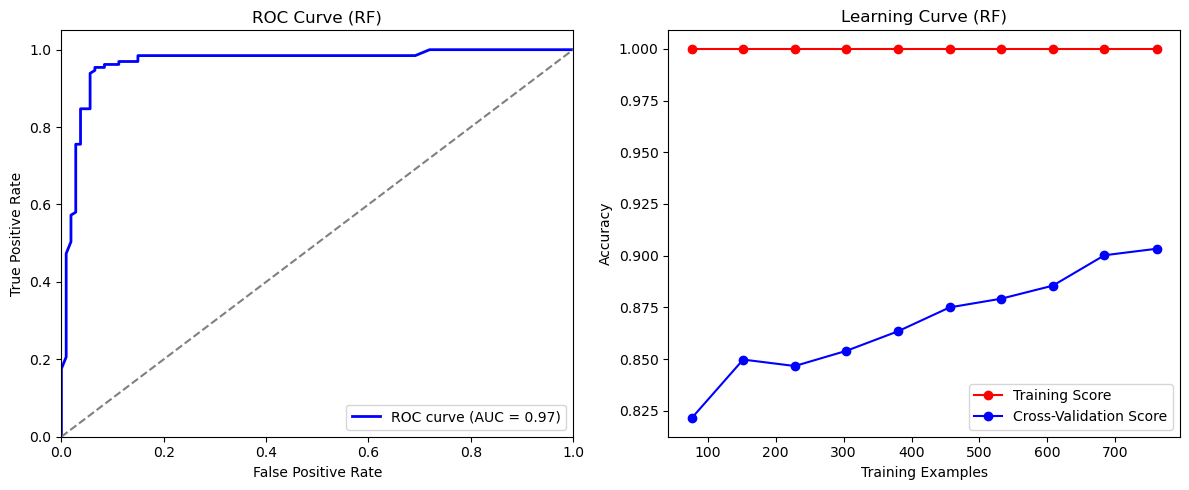

In [8]:
# =============================================
# Random Forest (RF) Model
# =============================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Initial RF Model
# ----------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Model accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")

# ----------------------------
# K-Fold Cross-Validation
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf_model.fit(X_fold_train, y_fold_train)
    y_fold_pred_rf = rf_model.predict(X_fold_val)
    rf_scores.append(accuracy_score(y_fold_val, y_fold_pred_rf))

print(f"K-Fold Mean Accuracy (Initial RF): {np.mean(rf_scores):.4f}")

# ----------------------------
# Hyperparameter Tuning
# ----------------------------
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search_rf.fit(X_train, y_train)

best_params = grid_search_rf.best_params_
print(f"Best Hyperparameters: {best_params}")

# ----------------------------
# Train Best RF Model
# ----------------------------
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Test Accuracy of Best RF Model: {accuracy_best_rf:.4f}")

# K-Fold CV for optimized RF
best_rf_scores = []
for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    best_rf_model.fit(X_fold_train, y_fold_train)
    y_fold_pred_best_rf = best_rf_model.predict(X_fold_val)
    best_rf_scores.append(accuracy_score(y_fold_val, y_fold_pred_best_rf))

print(f"K-Fold Mean Accuracy (Best RF): {np.mean(best_rf_scores):.4f}")

# ----------------------------
# Classification Report, ROC, Learning Curve
# ----------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

# ROC Curve
if hasattr(rf_model, "predict_proba"):
    fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
else:
    fpr, tpr, roc_auc = [None]*3

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model,
    X_train, y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
if fpr is not None:
    ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('ROC Curve (RF)')
    ax[0].legend(loc='lower right')
else:
    ax[0].text(0.5, 0.5, 'ROC Curve Not Available', horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax[0].set_title('ROC Curve')

# Learning Curve
ax[1].plot(train_sizes, train_mean, 'o-', color='red', label='Training Score')
ax[1].plot(train_sizes, test_mean, 'o-', color='blue', label='Cross-Validation Score')
ax[1].set_xlabel('Training Examples')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Learning Curve (RF)')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()


Random Forest Boosting Model Accuracy: 0.9496

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238

K-Fold Mean Accuracy (RF + AdaBoost): 0.9107
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'estimator__max_depth': 5, 'estimator__n_estimators': 50, 'learning_rate': 0.1, 'n_estimators': 150}
Best K-Fold Accuracy: 0.9086
Test Set Accuracy: 0.9538


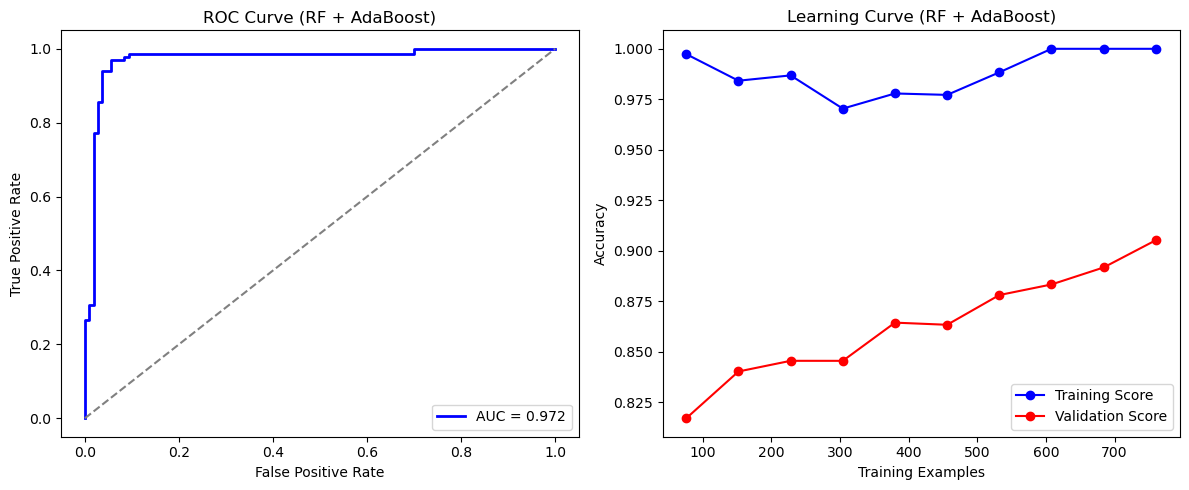

In [13]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ----------------------------
# Base Random Forest for AdaBoost
# ----------------------------
rf_base = RandomForestClassifier(n_estimators=50, random_state=42)
rf_boost = AdaBoostClassifier(estimator=rf_base, n_estimators=50, random_state=42)

# Train initial model
rf_boost.fit(X_train, y_train)

# Test predictions
y_pred_rf_boost = rf_boost.predict(X_test)
accuracy_rf_boost = accuracy_score(y_test, y_pred_rf_boost)
print(f"Random Forest Boosting Model Accuracy: {accuracy_rf_boost:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf_boost))

# ----------------------------
# K-Fold Cross Validation
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_boost_scores = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf_boost.fit(X_fold_train, y_fold_train)
    y_fold_pred = rf_boost.predict(X_fold_val)
    rf_boost_scores.append(accuracy_score(y_fold_val, y_fold_pred))

print(f"K-Fold Mean Accuracy (RF + AdaBoost): {np.mean(rf_boost_scores):.4f}")

# ----------------------------
# Hyperparameter Tuning
# ----------------------------
param_grid = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [3, 5, 10],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(rf_boost, param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print(f"Best K-Fold Accuracy: {best_score:.4f}")

# Test performance of best model
y_pred_best = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# ----------------------------
# ROC Curve & Learning Curve
# ----------------------------
# ROC
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model,
    X_train, y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC
axes[0].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.3f}')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_title('ROC Curve (RF + AdaBoost)')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='lower right')

# Learning Curve
axes[1].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
axes[1].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
axes[1].set_title('Learning Curve (RF + AdaBoost)')
axes[1].set_xlabel('Training Examples')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


Bagged Logistic Regression Accuracy: 0.8571

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.87      0.87      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

K-Fold Mean Accuracy (Bagged LR): 0.8151


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

Best Hyperparameters: {'estimator__C': 1, 'n_estimators': 50}
Best K-Fold Accuracy: 0.8193
Test Set Accuracy: 0.8571


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

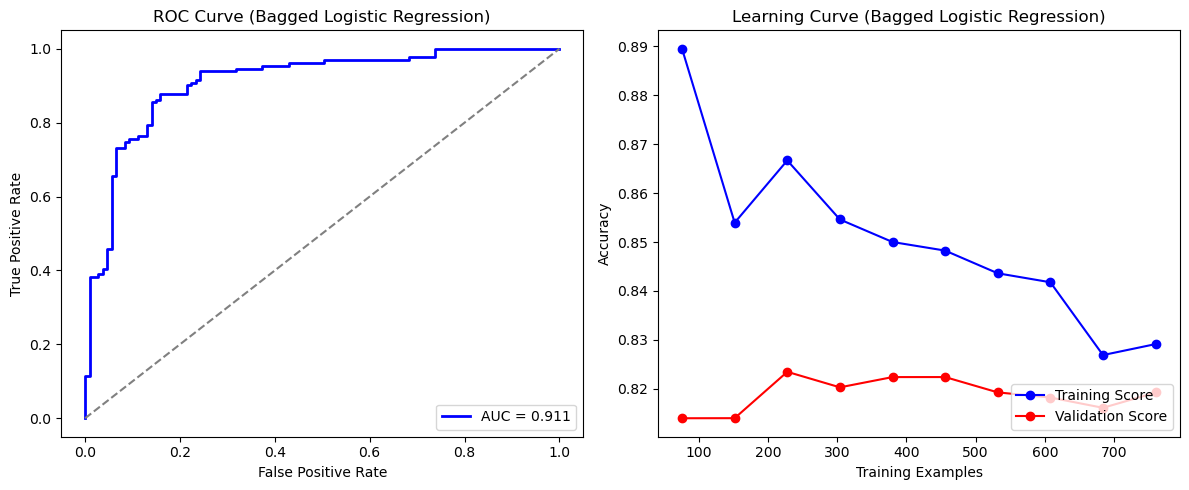

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# ----------------------------
# Bagged Logistic Regression
# ----------------------------
bagged_lr = BaggingClassifier(
    estimator=LogisticRegression(max_iter=2000, solver="saga"),
    n_estimators=50,
    random_state=42
)
bagged_lr.fit(X_train_scaled, y_train)

# Test seti tahmini
y_pred_bagged_lr = bagged_lr.predict(X_test_scaled)
accuracy_bagged_lr = accuracy_score(y_test, y_pred_bagged_lr)
print(f"Bagged Logistic Regression Accuracy: {accuracy_bagged_lr:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_bagged_lr))

# ----------------------------
# K-Fold Cross Validation
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
bagged_lr_scores = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Ölçekleme
    X_fold_train_scaled = scaler.transform(X_fold_train)
    X_fold_val_scaled = scaler.transform(X_fold_val)
    
    bagged_lr.fit(X_fold_train_scaled, y_fold_train)
    y_fold_pred = bagged_lr.predict(X_fold_val_scaled)
    bagged_lr_scores.append(accuracy_score(y_fold_val, y_fold_pred))

print(f"K-Fold Mean Accuracy (Bagged LR): {np.mean(bagged_lr_scores):.4f}")

# ----------------------------
# Hyperparameter Tuning
# ----------------------------
param_grid = {
    "estimator__C": [0.01, 0.1, 1, 10],
    "n_estimators": [50, 100, 200]
}

grid_search = GridSearchCV(
    estimator=BaggingClassifier(
        estimator=LogisticRegression(max_iter=5000, solver="saga"), random_state=42
    ),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
best_bagged_lr = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print(f"Best K-Fold Accuracy: {best_score:.4f}")

# Test set performance
y_pred_best = best_bagged_lr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# ----------------------------
# ROC Curve & Learning Curve
# ----------------------------
y_probs = best_bagged_lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

train_sizes, train_scores, val_scores = learning_curve(
    best_bagged_lr,
    X_train_scaled, y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC
axes[0].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.3f}')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_title('ROC Curve (Bagged Logistic Regression)')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='lower right')

# Learning Curve
axes[1].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
axes[1].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
axes[1].set_title('Learning Curve (Bagged Logistic Regression)')
axes[1].set_xlabel('Training Examples')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


In [15]:
# -----------------------------
# META-LEARNING MODELS
# -----------------------------
# -----------------------------
## Super Learners (Stacking)
# -----------------------------

In [1]:
# ----------------------------
# Import Required Libraries
# ----------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, 
                              RandomForestClassifier, HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# ----------------------------
# Load Dataset
# ----------------------------
file_path = "TEZ_DATASET.csv"
df = pd.read_csv(file_path)

# Replace spaces in column names with underscores
df.columns = [col.replace(" ", "_") for col in df.columns]
print(df.head())

# Features (X) and target variable (y)
X = df.drop(columns=["target"])
y = df["target"]

# ----------------------------
# Define Base Learners
# ----------------------------
ada = AdaBoostClassifier(random_state=42)
gbm = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
lgb = LGBMClassifier(random_state=42, verbose=-1)
rf = RandomForestClassifier(random_state=42)
s_gbm = GradientBoostingClassifier(subsample=0.8, random_state=42)  # Stochastic Gradient Boosting
ada_rf = AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42), 
                            random_state=42)

# ----------------------------
# Define Meta Learner
# ----------------------------
meta_learner = HistGradientBoostingClassifier(random_state=42)

# ----------------------------
# Hyperparameter Grids
# ----------------------------
param_grids = {
    'ada': {
        'n_estimators': [50, 100, 150],       # Number of estimators
        'learning_rate': [0.01, 0.1, 1],      # Learning rate
        'algorithm': ['SAMME', 'SAMME.R']     # Algorithm type
    },
    'gbm': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    },
    'xgb': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    'lgb': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    's_gbm': {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0]
    },
    'rf': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'ada_rf': {
        'estimator__n_estimators': [50, 100, 150],  # Number of RF trees
        'estimator__max_depth': [3, 5, 10],         # RF depth
        'n_estimators': [50, 100, 150],                  # Number of AdaBoost trees
        'learning_rate': [0.01, 0.1, 1]                  # Learning rate
    }
}

# ----------------------------
# Run GridSearchCV for Each Base Learner
# ----------------------------
grid_search_results = {}
for model_name, model in zip(
    ['ada', 'gbm', 'xgb', 'lgb', 'rf', 's_gbm', 'ada_rf'],
    [ada, gbm, xgb, lgb, rf, s_gbm, ada_rf]
):
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grids[model_name], 
        cv=5, 
        n_jobs=-1, 
        verbose=0
    )
    grid_search.fit(X, y)
    grid_search_results[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# ----------------------------
# Build Stacking Model with Optimized Base Learners
# ----------------------------
stacking_clf = StackingCVClassifier(
    classifiers=[
        grid_search_results['ada'], grid_search_results['gbm'], grid_search_results['xgb'], 
        grid_search_results['lgb'], grid_search_results['rf'], grid_search_results['s_gbm'], 
        grid_search_results['ada_rf']
    ], 
    meta_classifier=meta_learner, 
    use_probas=True, 
    cv=5,  # 5-fold cross-validation
    random_state=42
)

# ----------------------------
# Train and Evaluate Stacking Model
# ----------------------------
stacking_clf.fit(X, y)
stacking_accuracy = stacking_clf.score(X, y)
print(f"Accuracy of optimized stacking model: {stacking_accuracy:.4f}")


   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
Best parameters for ada: {'algorithm': 'SAMME', 'learning

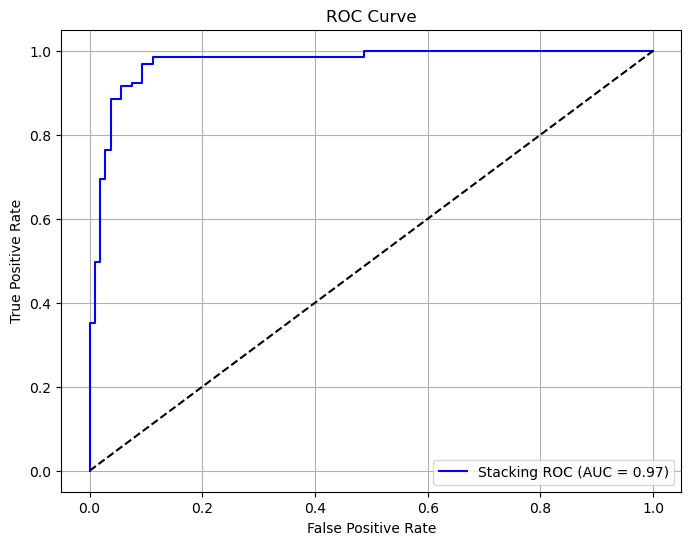

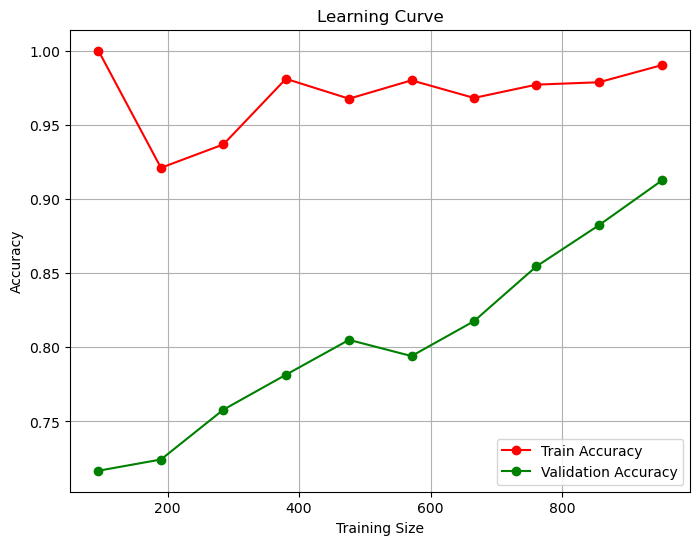

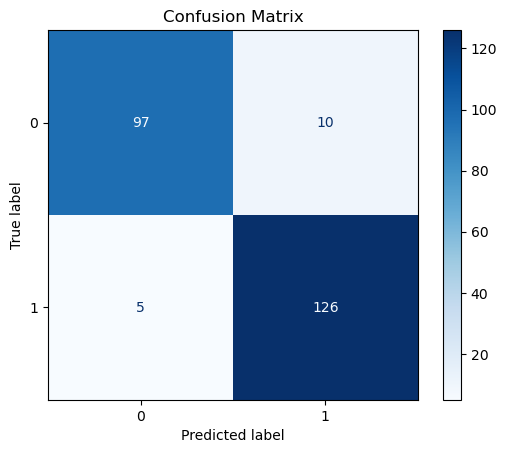

In [2]:
# =====================================================================
# Model Evaluation and Visualization for Stacking Ensemble
# =====================================================================

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Train-Test Split
# -----------------------------
# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit stacking classifier on the training set
stacking_clf.fit(X_train, y_train)

# -----------------------------
# ROC Curve and AUC
# -----------------------------
# Predict probabilities for the positive class
y_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Stacking ROC (AUC = {roc_auc:.2f})', color='b')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# -----------------------------
# Learning Curve
# -----------------------------
# Compute learning curves to assess bias-variance tradeoff
train_sizes, train_scores, test_scores = learning_curve(
    estimator=stacking_clf,
    X=X,
    y=y,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Train Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Accuracy")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# -----------------------------
# Confusion Matrix
# -----------------------------
# Predict classes on the test set
y_pred = stacking_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [3]:
# =====================================================================
# Classification Report for Stacking Ensemble
# =====================================================================

from sklearn.metrics import classification_report, accuracy_score

# -----------------------------
# Predictions on Test Set
# -----------------------------
y_pred_stacking = stacking_clf.predict(X_test)

# -----------------------------
# Classification Report
# -----------------------------
# Print detailed classification metrics (precision, recall, f1-score)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_stacking))

# -----------------------------
# Optional: Accuracy Score
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Overall Accuracy: {accuracy:.4f}")



Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       107
           1       0.93      0.96      0.94       131

    accuracy                           0.94       238
   macro avg       0.94      0.93      0.94       238
weighted avg       0.94      0.94      0.94       238

Overall Accuracy: 0.9370


In [4]:
# =====================================================================
# Define Optimized Base Learners
# =====================================================================

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# -----------------------------
# Base Learners with Optimized Hyperparameters
# -----------------------------

# AdaBoost classifier
ada = AdaBoostClassifier(
    algorithm='SAMME',
    learning_rate=1,
    n_estimators=50,
    random_state=42
)

# Gradient Boosting Machine (GBM)
gbm = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# XGBoost classifier
xgb = XGBClassifier(
    learning_rate=0.2,
    max_depth=5,
    n_estimators=100,
    subsample=1.0,
    eval_metric="logloss",
    random_state=42
)

# LightGBM classifier
lgb = LGBMClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42,
    verbose=-1
)

# Random Forest classifier
rf = RandomForestClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_estimators=300,
    random_state=42
)

# Stochastic Gradient Boosting
s_gbm = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.6,
    random_state=42
)

# AdaBoost with Random Forest as base estimator
ada_rf = AdaBoostClassifier(
    estimator=RandomForestClassifier(
        max_depth=10,
        n_estimators=100,
        random_state=42
    ),
    learning_rate=1,
    n_estimators=50,
    random_state=42
)


In [5]:
# =====================================================================
# Stacking Ensemble with Logistic Regression Meta Learner
# =====================================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# -----------------------------
# Prepare Features and Target
# -----------------------------
X = df.drop(columns=["target"])  # Independent variables
y = df["target"]                 # Dependent variable

# -----------------------------
# Define Meta Learner (Logistic Regression with L2 regularization)
# -----------------------------
meta_learner = make_pipeline(
    StandardScaler(),  # Standardize features
    LogisticRegression(
        penalty="l2", 
        C=1.0, 
        solver="lbfgs", 
        max_iter=500
    )
)

# -----------------------------
# Define Stacking Classifier
# -----------------------------
stacking_lr = StackingCVClassifier(
    classifiers=[ada, gbm, xgb, lgb, rf, s_gbm, ada_rf],  # Base models
    meta_classifier=meta_learner,                        # Meta learner
    use_probas=True,                                     # Use probabilistic predictions
    random_state=42
)

# -----------------------------
# 5-Fold Cross-Validation Accuracy
# -----------------------------
cv_scores = cross_val_score(stacking_lr, X, y, cv=5, scoring="accuracy")
print(f"Stacking Model 5-Fold Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# -----------------------------
# Fit Model on Full Dataset
# -----------------------------
stacking_lr.fit(X, y)
stacking_accuracy = stacking_lr.score(X, y)
print(f"Stacking Model Accuracy on Full Data: {stacking_accuracy:.4f}")

# -----------------------------
# Train-Test Split Evaluation
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
stacking_lr.fit(X_train, y_train)

# Predictions on test set
y_pred_stacking = stacking_lr.predict(X_test)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_stacking))


Stacking Model 5-Fold Accuracy: 0.9328 ± 0.0323
Stacking Model Accuracy on Full Data: 0.9992

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.95      0.98      0.96       131

    accuracy                           0.96       238
   macro avg       0.96      0.96      0.96       238
weighted avg       0.96      0.96      0.96       238



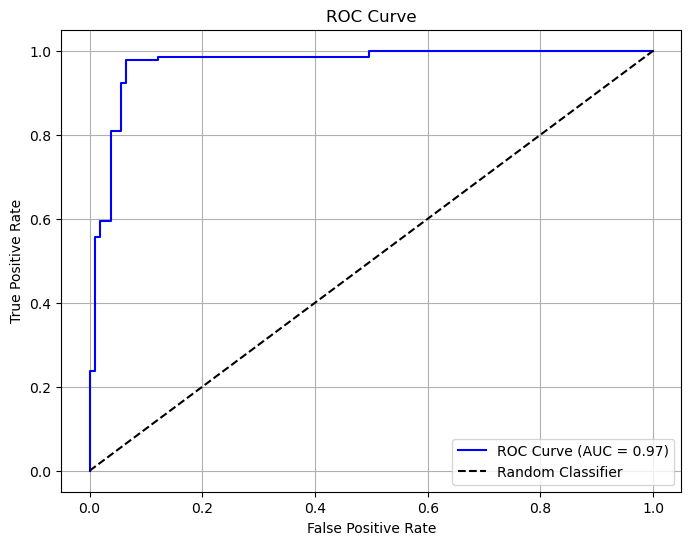

In [6]:
# =====================================================================
# ROC Curve for Stacking Classifier
# =====================================================================

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# -----------------------------
# Predict Probabilities for the Positive Class
# -----------------------------
y_proba = stacking_lr.predict_proba(X_test)[:, 1]

# -----------------------------
# Compute ROC Curve and AUC
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# -----------------------------
# Plot ROC Curve
# -----------------------------
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0,1], [0,1], 'k--', label='Random Classifier')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [7]:
# =====================================================================
# Stacking Ensemble with XGBoost Meta Learner
# =====================================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# -----------------------------
# Prepare Features and Target
# -----------------------------
X = df.drop(columns=["target"])  # Independent variables
y = df["target"]                 # Dependent variable

# -----------------------------
# Define Meta Learner (XGBoost)
# -----------------------------
meta_learner = XGBClassifier(
    n_estimators=100,
    eval_metric="logloss",
    random_state=42
)

# -----------------------------
# Define Stacking Classifier
# -----------------------------
stacking_xgb = StackingCVClassifier(
    classifiers=[ada, gbm, xgb, lgb, rf, s_gbm, ada_rf],  # Base models
    meta_classifier=meta_learner,                        # XGBoost as meta learner
    use_probas=True,                                     # Use probabilistic predictions
    cv=5,                                                # 5-Fold Cross Validation
    random_state=42
)

# -----------------------------
# 5-Fold Cross-Validation Accuracy
# -----------------------------
cv_scores = cross_val_score(stacking_xgb, X, y, cv=5, scoring="accuracy")
print(f"Stacking Model 5-Fold Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# -----------------------------
# Fit Model on Full Dataset
# -----------------------------
stacking_xgb.fit(X, y)
stacking_accuracy = stacking_xgb.score(X, y)
print(f"Stacking Model Accuracy on Full Data: {stacking_accuracy:.4f}")

# -----------------------------
# Train-Test Split Evaluation
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
stacking_xgb.fit(X_train, y_train)

# Predictions on test set
y_pred_stacking = stacking_xgb.predict(X_test)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_stacking))


Stacking Model 5-Fold Accuracy: 0.9109 ± 0.0228
Stacking Model Accuracy on Full Data: 0.9992

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       107
           1       0.92      0.94      0.93       131

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



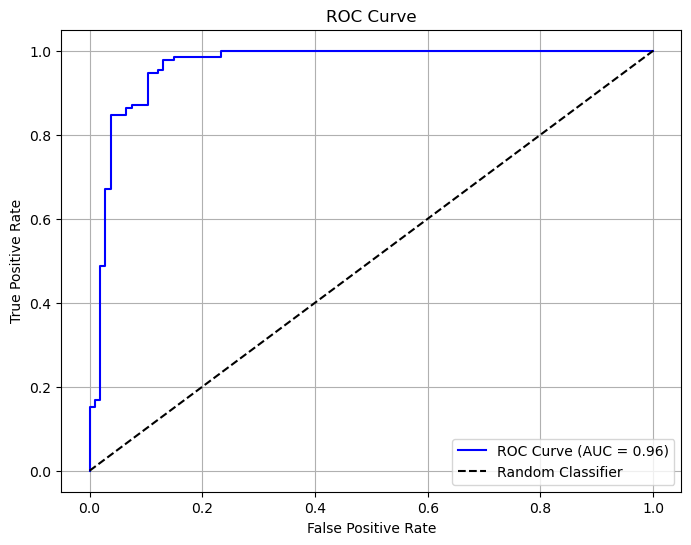

In [8]:
# =====================================================================
# ROC Curve for Stacking Classifier with XGBoost Meta Learner
# =====================================================================

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# -----------------------------
# Predict Probabilities for the Positive Class
# -----------------------------
y_proba = stacking_xgb.predict_proba(X_test)[:, 1]

# -----------------------------
# Compute ROC Curve and AUC
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# -----------------------------
# Plot ROC Curve
# -----------------------------
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0,1], [0,1], 'k--', label='Random Classifier')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [9]:
# -----------------------------
# META-LEARNING MODELS
# -----------------------------
# -----------------------------
## Light Optimization Blending
# -----------------------------

In [10]:
# ----------------------------
# Import Required Libraries
# ----------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# ----------------------------
# Load and Preprocess Dataset
# ----------------------------
dataset_path = "TEZ_DATASET.csv"
df = pd.read_csv(dataset_path)

# Replace spaces in column names with underscores for consistency
df.columns = [col.replace(" ", "_") for col in df.columns]
print(df.head())

# Separate features and target
X = df.drop(columns=["target"]).values  # Convert to NumPy array
y = df["target"].values

# ----------------------------
# Train-Test Split
# ----------------------------
# 80% training, 20% testing with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# Define Base Learners
# ----------------------------
# Ensemble of diverse classifiers
base_models = [
    ("ada", AdaBoostClassifier(n_estimators=100, random_state=42)),
    ("gbm", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("xgb", XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42)),  # use_label_encoder removed
    ("lgb", LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)),
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
]

# ----------------------------
# Generate Base Model Predictions (5-Fold Blending)
# ----------------------------
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
base_predictions_proba = np.zeros((X_train.shape[0], len(base_models)))
test_predictions_proba = np.zeros((kf.get_n_splits(), X_test.shape[0], len(base_models)))

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train[train_index], y_train[val_index]
    
    for j, (name, model) in enumerate(base_models):
        # Train base model on fold
        model.fit(X_tr, y_tr)
        
        # Predict probabilities on validation fold
        base_predictions_proba[val_index, j] = model.predict_proba(X_val)[:, 1]
        
        # Predict probabilities on test set for current fold
        test_predictions_proba[i, :, j] = model.predict_proba(X_test)[:, 1]

# Average test set predictions across folds
test_predictions_proba = test_predictions_proba.mean(axis=0)

# ----------------------------
# Train Meta-Model
# ----------------------------
# Logistic Regression is used as the meta-learner
meta_model = LogisticRegression()
meta_model.fit(base_predictions_proba, y_train)  # Fit on full training set
meta_predictions_proba = meta_model.predict_proba(test_predictions_proba)[:, 1]

# ----------------------------
# Evaluate Model Performance
# ----------------------------
auc_score = roc_auc_score(y_test, meta_predictions_proba)
print(f"Blending Model AUC Score: {auc_score:.4f}")


   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
Blending Model AUC Score: 0.9717


In [11]:
# ----------------------------
# Import Required Libraries
# ----------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# ----------------------------
# Load and Preprocess Dataset
# ----------------------------
dataset_path = "TEZ_DATASET.csv"
df = pd.read_csv(dataset_path)
df.columns = [col.replace(" ", "_") for col in df.columns]  # Standardize column names
print(df.head())

# Separate features and target
X = df.drop(columns=["target"]).values  # Convert features to NumPy array
y = df["target"].values

# ----------------------------
# Train-Test Split
# ----------------------------
# 80% training, 20% testing with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# Define Base Learners
# ----------------------------
# Ensemble of classifiers for blending
base_models = [
    ("ada", AdaBoostClassifier(random_state=42)),
    ("gbm", GradientBoostingClassifier(random_state=42)),
    ("xgb", XGBClassifier(eval_metric="logloss", random_state=42)),
    ("lgb", LGBMClassifier(random_state=42, verbose=-1)),
    ("rf", RandomForestClassifier(random_state=42))
]

# ----------------------------
# Define Hyperparameter Grids
# ----------------------------
# Parameter grids for each base learner for GridSearchCV
param_grids = {
    "ada": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 1]},
    "gbm": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7]},
    "xgb": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7]},
    "lgb": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7]},
    "rf": {"n_estimators": [50, 100, 150], "max_depth": [10, 20, None]}
}

# ----------------------------
# Generate Base Model Predictions (5-Fold Blending with Hyperparameter Tuning)
# ----------------------------
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
base_predictions_proba = np.zeros((X_train.shape[0], len(base_models)))
test_predictions_proba = np.zeros((kf.get_n_splits(), X_test.shape[0], len(base_models)))

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train[train_index], y_train[val_index]
    
    for j, (name, model) in enumerate(base_models):
        print(f"Tuning {name} model...")
        
        # Apply GridSearchCV to find optimal hyperparameters
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring="roc_auc", n_jobs=-1)
        grid_search.fit(X_tr, y_tr)
        
        best_model = grid_search.best_estimator_  # Retrieve best estimator
        print(f"Best Parameters for {name}: {grid_search.best_params_}")
        
        # Predict probabilities on validation fold
        base_predictions_proba[val_index, j] = best_model.predict_proba(X_val)[:, 1]
        
        # Predict probabilities on test set for current fold
        test_predictions_proba[i, :, j] = best_model.predict_proba(X_test)[:, 1]

# Average test set predictions across folds
test_predictions_proba = test_predictions_proba.mean(axis=0)

# ----------------------------
# Train Meta-Model
# ----------------------------
# Logistic Regression as the meta-learner
meta_model = LogisticRegression()
meta_model.fit(base_predictions_proba, y_train)  # Fit on entire training set
meta_predictions_proba = meta_model.predict_proba(test_predictions_proba)[:, 1]

# ----------------------------
# Evaluate Model Performance
# ----------------------------
auc_score = roc_auc_score(y_test, meta_predictions_proba)
print(f"Blending Model AUC Score: {auc_score:.4f}")


   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
Tuning ada model...
Best Parameters for ada: {'learning_r

Blending Model AUC Score: 0.9718
Accuracy: 0.9202
Precision: 0.9350
Recall: 0.9127
F1 Score: 0.9237


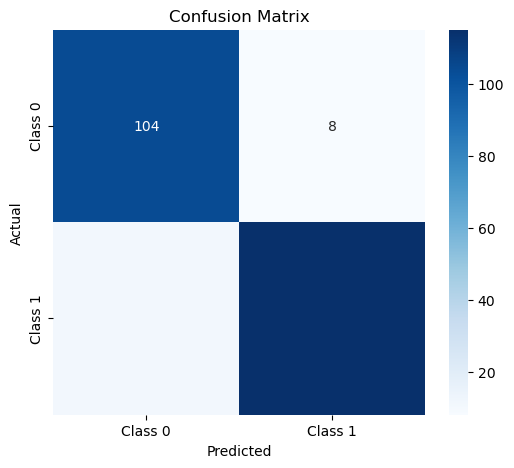

Classification Report:

              precision    recall  f1-score   support

           0     0.9043    0.9286    0.9163       112
           1     0.9350    0.9127    0.9237       126

    accuracy                         0.9202       238
   macro avg     0.9197    0.9206    0.9200       238
weighted avg     0.9206    0.9202    0.9202       238



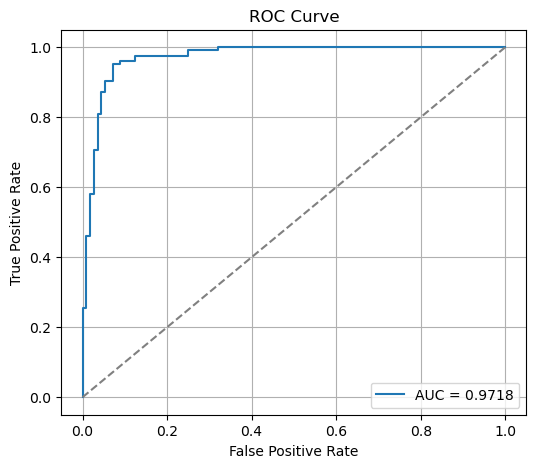

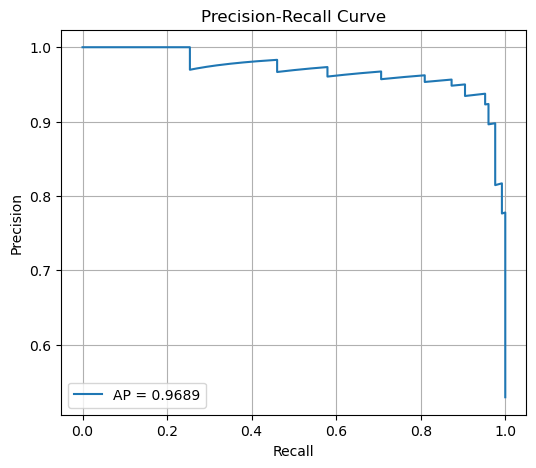

In [12]:
# ----------------------------
# Import Required Libraries
# ----------------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, classification_report, confusion_matrix, precision_recall_curve,
    average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----------------------------
# Threshold Predictions
# ----------------------------
# Convert predicted probabilities to class labels using 0.5 threshold
y_pred_labels = (meta_predictions_proba >= 0.5).astype(int)

# ----------------------------
# Basic Evaluation Metrics
# ----------------------------
auc_score = roc_auc_score(y_test, meta_predictions_proba)
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

print(f"Blending Model AUC Score: {auc_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ----------------------------
# Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------
# Classification Report
# ----------------------------
print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels, digits=4))

# ----------------------------
# ROC Curve and AUC
# ----------------------------
fpr, tpr, thresholds = roc_curve(y_test, meta_predictions_proba)
auc = roc_auc_score(y_test, meta_predictions_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ----------------------------
# Precision-Recall Curve
# ----------------------------
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, meta_predictions_proba)
ap = average_precision_score(y_test, meta_predictions_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals, label=f"AP = {ap:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


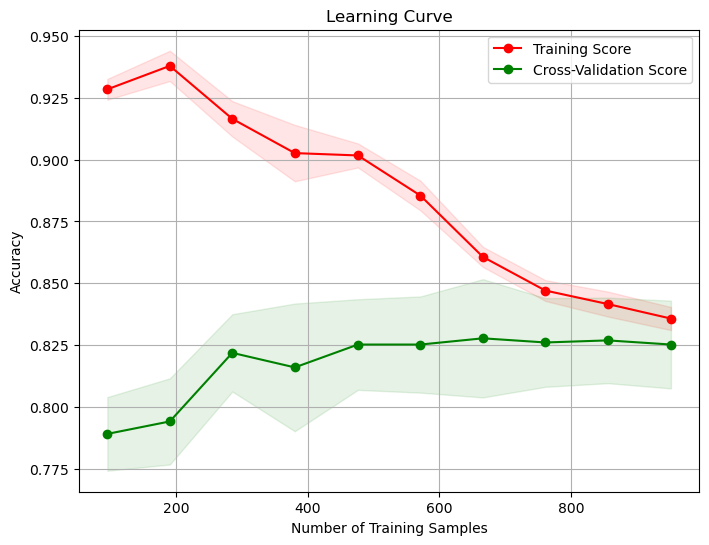

In [23]:
# ============================================================
# Learning Curve Visualization for Meta-Model
# ============================================================

from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Define Cross-Validation Strategy
# ----------------------------
# Use StratifiedKFold to preserve class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ----------------------------
# Compute Learning Curve Data
# ----------------------------
train_sizes, train_scores, test_scores = learning_curve(
    estimator=meta_model,
    X=X,
    y=y,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

meta_model = LogisticRegression(max_iter=2000, random_state=42)

# Compute mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# ----------------------------
# Plot Learning Curve
# ----------------------------
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.title("Learning Curve")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [24]:
# -----------------------------
# META-LEARNING MODELS
# -----------------------------
# -----------------------------
## Comprehensive Optimization Blending 
# -----------------------------

In [25]:
# ----------------------------
# Import Required Libraries
# ----------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# ----------------------------
# Load and Preprocess Dataset
# ----------------------------
dataset_path = "TEZ_DATASET.csv"
df = pd.read_csv(dataset_path)

# Standardize column names by replacing spaces with underscores
df.columns = [col.replace(" ", "_") for col in df.columns]
print(df.head())

# Separate features and target
X = df.drop(columns=["target"]).values  # Convert features to NumPy array
y = df["target"].values

# ----------------------------
# Train-Test Split
# ----------------------------
# 80% training, 20% testing with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# Define Base Learners
# ----------------------------
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42)
lgb = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
s_gbm = GradientBoostingClassifier(n_estimators=100, subsample=0.8, random_state=42)  # Stochastic Gradient Boosting
ada_rf = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(n_estimators=50, random_state=42),
    n_estimators=100,
    random_state=42
)

# List of base models for blending
base_models = [
    ("ada", ada),
    ("gbm", gbm),
    ("xgb", xgb),
    ("lgb", lgb),
    ("rf", rf),
    ("s_gbm", s_gbm),
    ("ada_rf", ada_rf)
]

# ----------------------------
# Generate Base Model Predictions (5-Fold Blending)
# ----------------------------
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
base_predictions_proba = np.zeros((X_train.shape[0], len(base_models)))
test_predictions_proba = np.zeros((kf.get_n_splits(), X_test.shape[0], len(base_models)))

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train[train_index], y_train[val_index]
    
    for j, (name, model) in enumerate(base_models):
        # Train base model on the fold
        model.fit(X_tr, y_tr)
        
        # Predict probabilities on validation fold
        base_predictions_proba[val_index, j] = model.predict_proba(X_val)[:, 1]
        
        # Predict probabilities on test set for current fold
        test_predictions_proba[i, :, j] = model.predict_proba(X_test)[:, 1]

# Average test set predictions across folds
test_predictions_proba = test_predictions_proba.mean(axis=0)

# ----------------------------
# Train Meta-Model
# ----------------------------
meta_model = LogisticRegression()
meta_model.fit(base_predictions_proba, y_train)  # Fit on entire training set
meta_predictions_proba = meta_model.predict_proba(test_predictions_proba)[:, 1]

# ----------------------------
# Evaluate Model Performance
# ----------------------------
auc_score = roc_auc_score(y_test, meta_predictions_proba)
print(f"Blending Model AUC Score: {auc_score:.4f}")


   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
Blending Model AUC Score: 0.9728


In [26]:
# ----------------------------
# Import Required Libraries
# ----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

# ----------------------------
# Load and Preprocess Dataset
# ----------------------------
dataset_path = "TEZ_DATASET.csv"
df = pd.read_csv(dataset_path)

# Standardize column names by replacing spaces with underscores
df.columns = [col.replace(" ", "_") for col in df.columns]
print(df.head())

# Separate features and target
X = df.drop(columns=["target"]).values
y = df["target"].values

# ----------------------------
# Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# Define Base Learners
# ----------------------------
base_models = [
    ("ada", AdaBoostClassifier(random_state=42)),
    ("gbm", GradientBoostingClassifier(random_state=42)),
    ("xgb", XGBClassifier(eval_metric="logloss", random_state=42)),
    ("lgb", LGBMClassifier(random_state=42, verbose=-1)),
    ("rf", RandomForestClassifier(random_state=42)),
    ("s_gbm", GradientBoostingClassifier(subsample=0.8, random_state=42)),
    ("ada_rf", AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42), random_state=42))
]

# ----------------------------
# Define Hyperparameter Grids
# ----------------------------
param_grids = {
    'ada': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'gbm': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'xgb': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'lgb': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'rf': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]},
    's_gbm': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'ada_rf': {'n_estimators': [50, 100, 200], 'estimator__n_estimators': [50, 100]}
}

# ----------------------------
# 5-Fold Cross-Validation for Blending
# ----------------------------
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
base_predictions_proba = np.zeros((X_train.shape[0], len(base_models)))
test_predictions_proba = np.zeros((kf.get_n_splits(), X_test.shape[0], len(base_models)))

for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train[train_index], y_train[val_index]
    
    for j, (name, model) in enumerate(base_models):
        print(f"Tuning {name} model...")
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring="roc_auc", n_jobs=-1)
        grid_search.fit(X_tr, y_tr)

        best_model = grid_search.best_estimator_
        print(f"Best Parameters for {name}: {grid_search.best_params_}")

        # Store validation probabilities
        base_predictions_proba[val_index, j] = best_model.predict_proba(X_val)[:, 1]
        # Store test probabilities for this fold
        test_predictions_proba[i, :, j] = best_model.predict_proba(X_test)[:, 1]

# Average test set predictions across folds
test_predictions_proba = test_predictions_proba.mean(axis=0)

# ----------------------------
# Train Meta-Model
# ----------------------------
meta_model = LogisticRegression()
meta_model.fit(base_predictions_proba, y_train)
meta_predictions_proba = meta_model.predict_proba(test_predictions_proba)[:, 1]

# ----------------------------
# Evaluate Model Performance
# ----------------------------
auc_score = roc_auc_score(y_test, meta_predictions_proba)
print(f"\nBlending Model AUC Score: {auc_score:.4f}")


   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
Tuning ada model...
Best Parameters for ada: {'learning_r

Blending Model AUC Score: 0.9718
Accuracy: 0.9202
Precision: 0.9350
Recall: 0.9127
F1 Score: 0.9237


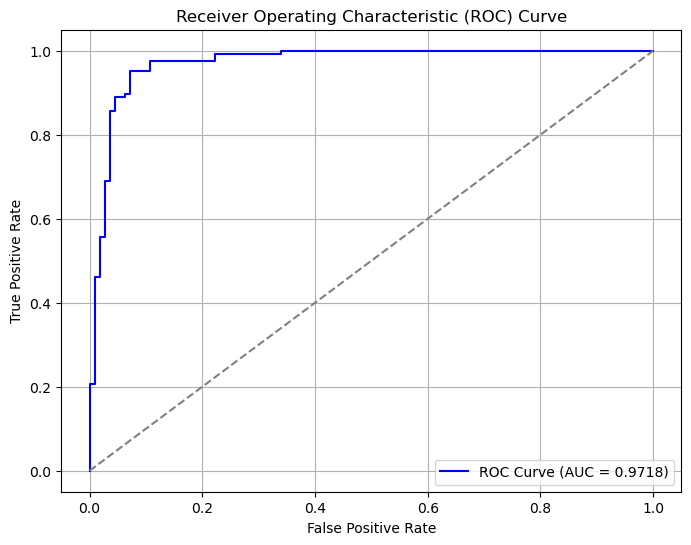

In [27]:
# ============================================================
# Performance Evaluation of Blending Meta-Model
# ============================================================

# ----------------------------
# Import Required Libraries
# ----------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ----------------------------
# Compute Evaluation Metrics
# ----------------------------
auc_score = roc_auc_score(y_test, meta_predictions_proba)
accuracy = accuracy_score(y_test, meta_model.predict(test_predictions_proba))
precision = precision_score(y_test, meta_model.predict(test_predictions_proba))
recall = recall_score(y_test, meta_model.predict(test_predictions_proba))
f1 = f1_score(y_test, meta_model.predict(test_predictions_proba))

# Print performance metrics
print(f"Blending Model AUC Score: {auc_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ----------------------------
# Plot ROC Curve
# ----------------------------
fpr, tpr, thresholds = roc_curve(y_test, meta_predictions_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


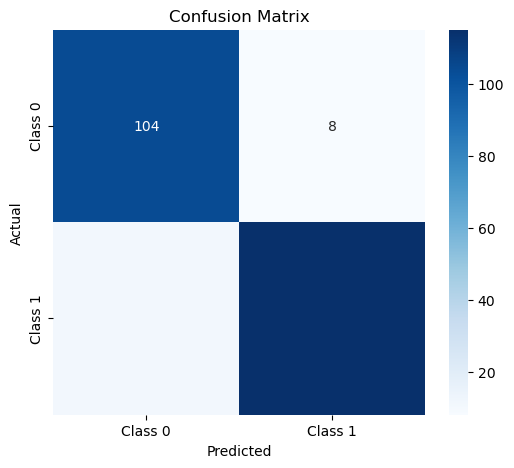

Classification Report:

              precision    recall  f1-score   support

           0     0.9043    0.9286    0.9163       112
           1     0.9350    0.9127    0.9237       126

    accuracy                         0.9202       238
   macro avg     0.9197    0.9206    0.9200       238
weighted avg     0.9206    0.9202    0.9202       238



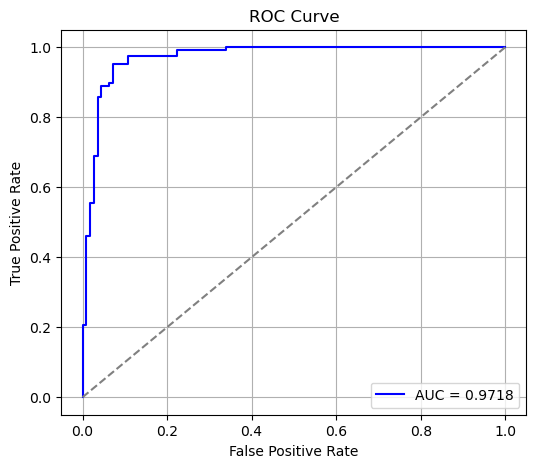

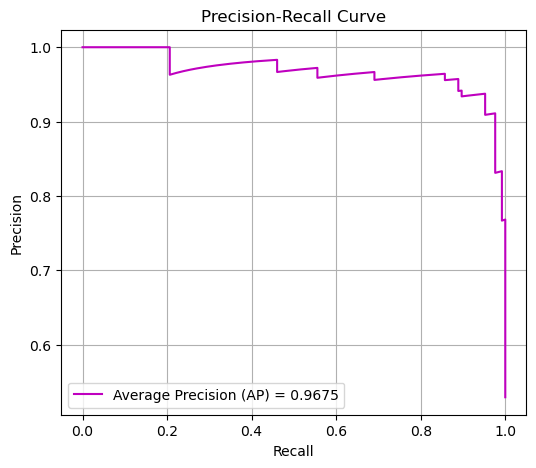

In [28]:
# ============================================================
# Detailed Classification Performance Evaluation
# ============================================================

# ----------------------------
# Import Required Libraries
# ----------------------------
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    roc_auc_score, 
    precision_recall_curve,
    average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----------------------------
# Convert Probabilities to Binary Labels
# ----------------------------
y_pred_labels = (meta_predictions_proba >= 0.5).astype(int)  # Threshold = 0.5

# ----------------------------
# 1) Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"]
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# ----------------------------
# 2) Classification Report
# ----------------------------
print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels, digits=4))

# ----------------------------
# 3) ROC Curve + AUC
# ----------------------------
fpr, tpr, thresholds = roc_curve(y_test, meta_predictions_proba)
auc = roc_auc_score(y_test, meta_predictions_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='b', label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ----------------------------
# 4) Precision-Recall Curve
# ----------------------------
precision, recall, thresholds_pr = precision_recall_curve(y_test, meta_predictions_proba)
ap = average_precision_score(y_test, meta_predictions_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='m', label=f"Average Precision (AP) = {ap:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


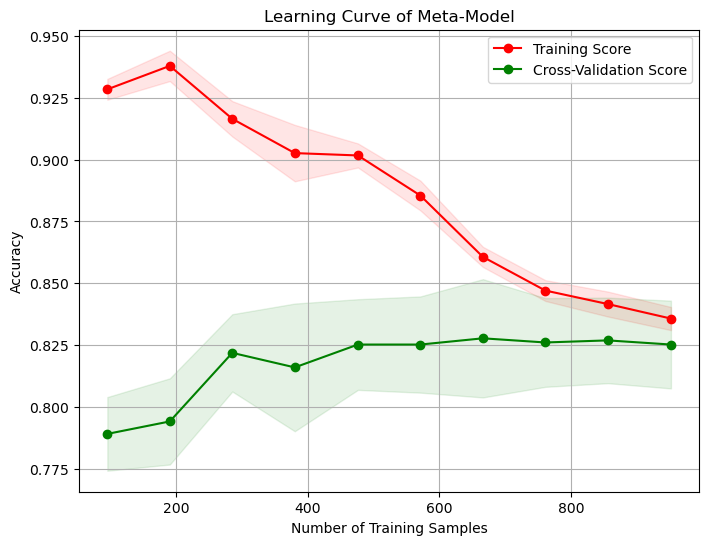

In [30]:
# ----------------------------
# Import Required Libraries
# ----------------------------
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Stratified K-Fold Cross-Validation for Learning Curve
# ----------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    meta_model, X, y, cv=cv, scoring='accuracy', 
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

meta_model = LogisticRegression(max_iter=3000, random_state=42)

# Calculate mean and standard deviation of train/test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# ----------------------------
# Plot Learning Curve
# ----------------------------
plt.figure(figsize=(8, 6))

# Fill the areas for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plot mean accuracy curves
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.title("Learning Curve of Meta-Model")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()
